In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error

sns.set_style("whitegrid")
pd.set_option('display.max_columns', None) #forces all columns to be displayed
pd.set_option('display.max_rows', None) #forces all rows to be displayed

In [3]:
filepath = r'../data/data_final.csv'

#An extraneous column was originally created by to_csv in data_final, and the drop method removes it
data = pd.read_csv(filepath)#.drop(columns='Unnamed: 0') 

In [4]:
data.head()

,FIPS,State,County,% Adults with Diabetes,% Completed High School,% Non-Hispanic White,Food Environment Index,Median Household Income,% Excessive Drinking,% Households with Broadband Access,% with Annual Mammogram,% Census Participation,% Vaccinated,% Homeowners,% With Access to Exercise Opportunities,% Severe Housing Problems,Average Daily PM2.5,% Unemployed,% Uninsured,Income Ratio,% Black,% Adults Reporting Currently Smoking,% Frequent Mental Distress,% Adults with Obesity,% Children in Single-Parent Households,% Insufficient Sleep,% Food Insecure,% Children in Poverty,% Frequent Physical Distress,% Physically Inactive
0,1001,Alabama,Autauga,10.7,90.402608,72.051072,6.7,70148.0,15.237822,89.066703,40.0,68.8,37.0,75.452752,54.491965,15.375696,10.0,2.269588,10.018560,4.637675,21.011061,16.9,18.0,38.9,22.702506,37.5,13.3,15.7,11.7,29.1
1,1003,Alabama,Baldwin,9.8,91.599310,82.978473,7.5,71704.0,16.422564,88.920949,44.0,56.4,42.0,77.870531,63.129350,12.427866,7.6,2.350047,10.997067,4.482449,8.224887,15.0,17.3,37.2,19.051287,35.1,11.8,16.1,11.0,27.6
2,1005,Alabama,Barbour,15.6,76.492221,45.272403,6.0,41151.0,12.277198,68.223159,42.0,54.5,35.0,64.973381,54.854696,15.075107,9.4,4.065041,12.677634,5.576797,47.195013,25.0,20.5,43.4,50.660451,43.9,17.8,37.7,15.8,40.2
3,1007,Alabama,Bibb,12.4,78.863422,73.996819,7.6,54309.0,14.785821,79.711752,36.0,56.0,28.0,75.734479,43.390302,12.258953,9.8,2.509741,11.379928,5.669237,20.736196,22.0,19.4,39.6,30.713370,40.0,14.9,25.5,14.0,36.0
4,1009,Alabama,Blount,10.5,81.755151,85.992741,7.7,60553.0,14.946115,82.724498,35.0,66.7,36.0,79.274947,41.355227,10.657864,9.6,2.225151,12.819978,4.611946,1.727383,19.6,18.8,37.7,22.969477,37.3,13.7,15.8,12.8,30.4


In [5]:
len(data.columns)

30

In [6]:
target = '% Adults with Diabetes'
features = data.columns[4:]

In [7]:
features

Index(['% Completed High School', '% Non-Hispanic White',
       'Food Environment Index', 'Median Household Income',
       '% Excessive Drinking', '% Households with Broadband Access',
       '% with Annual Mammogram', '% Census Participation', '% Vaccinated',
       '% Homeowners', '% With Access to Exercise Opportunities',
       '% Severe Housing Problems', 'Average Daily PM2.5', '% Unemployed',
       '% Uninsured', 'Income Ratio', '% Black',
       '% Adults Reporting Currently Smoking', '% Frequent Mental Distress',
       '% Adults with Obesity', '% Children in Single-Parent Households',
       '% Insufficient Sleep', '% Food Insecure', '% Children in Poverty',
       '% Frequent Physical Distress', '% Physically Inactive'],
      dtype='object')

Split the data:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

Check distribution of target variables

(array([ 73., 721., 943., 770., 379., 154.,  62.,  23.,  14.,   3.]),
 array([ 5.6 ,  7.26,  8.92, 10.58, 12.24, 13.9 , 15.56, 17.22, 18.88,
        20.54, 22.2 ]),
 <BarContainer object of 10 artists>)

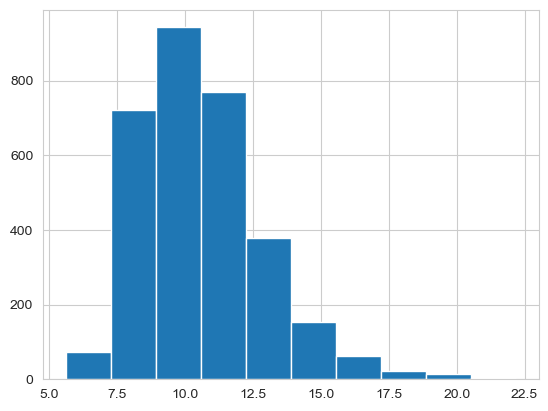

In [9]:
plt.hist(data[target])

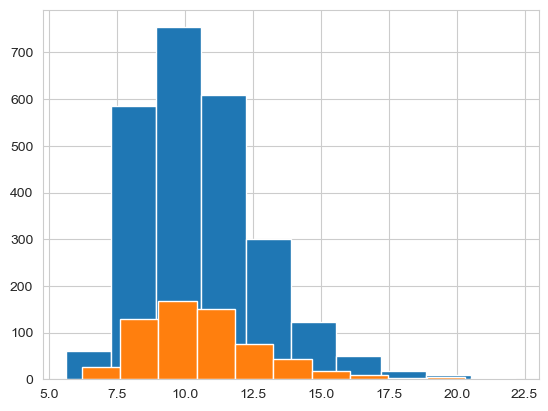

In [10]:
plt.hist(y_train)
plt.hist(y_test)

plt.show()

# Linear and XGB Regression Models

In [11]:
xgb = Pipeline([('scale', StandardScaler()),
                ('xgbreg', XGBRegressor())])

linear = Pipeline([('scale', StandardScaler()),
                ('linreg', LinearRegression())])

xgb.fit(X_train, y_train)
linear.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('linreg', LinearRegression())])

Check the fit on the training data:

In [12]:
linear_train_preds = linear.predict(X_train)
xgb_train_preds = xgb.predict(X_train)

print('Linear RMSE on the training set:', root_mean_squared_error(y_train, linear_train_preds))
print('XGB RMSE on the training set:', root_mean_squared_error(y_train, xgb_train_preds))

Linear RMSE on the training set: 0.4928585951758929
XGB RMSE on the training set: 0.04088565654273638


Check fit on the test set:

In [13]:
linear_test_preds = linear.predict(X_test)
xgb_test_preds = xgb.predict(X_test)

print('Linear RMSE on the test set:', root_mean_squared_error(y_test, linear_test_preds))
print('XGB RMSE on the test set:', root_mean_squared_error(y_test, xgb_test_preds))

Linear RMSE on the test set: 0.4869636801678668
XGB RMSE on the test set: 0.4829767703849686


Again, the result feels a little too good

In [ ]:
#data frame matching features with their importances computed from xgboost
xgb_importances = pd.DataFrame({'feature': features,
                               'importance_score': xgb['xgbreg'].feature_importances_})\
                                .sort_values(by='importance_score', ascending=False)

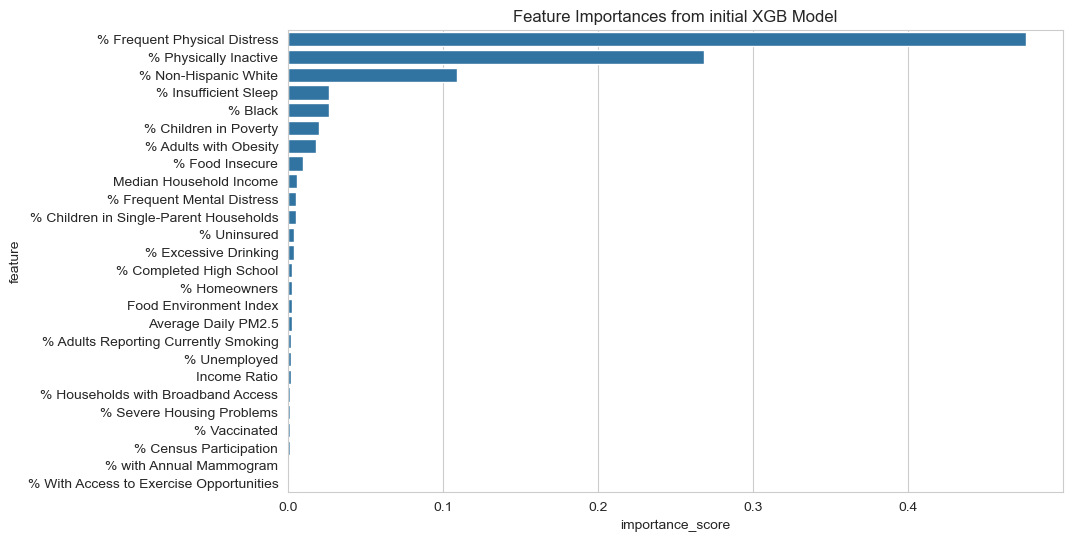

In [37]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances from initial XGB Model")
sns.barplot(data=xgb_importances, y='feature', x='importance_score', orient='h')

plt.show()

Computation of coefficient sizes for each feature in the linear model

In [36]:
#data frame matching features with their coefficients from the linear model
coefficients = pd.DataFrame({'feature': features,
                             'coefficient': linear['linreg'].coef_}).sort_values(by='coefficient', ascending=False)

intercept = linear['linreg'].intercept_

print(intercept)

10.55192996418623


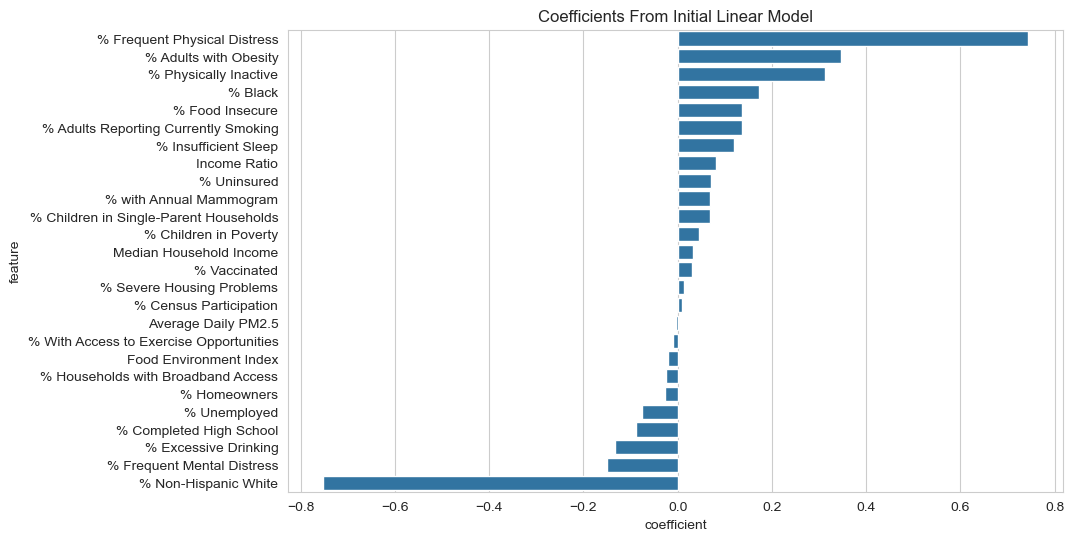

In [30]:
plt.figure(figsize=(10,6))
plt.title("Coefficients From Initial Linear Model")
sns.barplot(data=coefficients, orient='h', x='coefficient', y='feature')

plt.show()

In [ ]:
#data frame matching features with absolute values of their coefficients
abs_coefficients = pd.DataFrame({'feature': features,
                             'abs_coefficient': np.abs(linear['linreg'].coef_)})\
                                .sort_values(by='abs_coefficient', ascending=False)

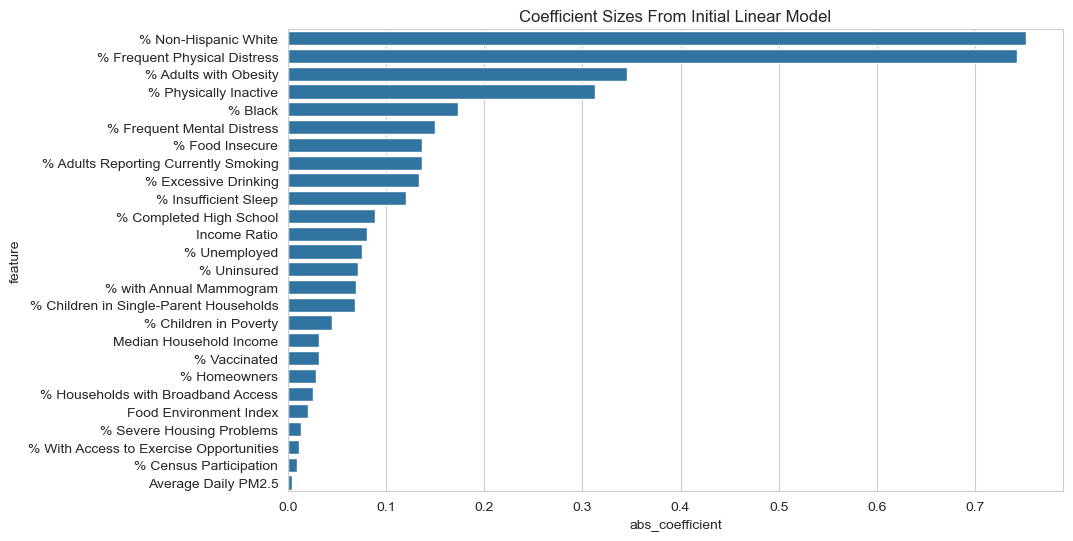

In [33]:
plt.figure(figsize=(10,6))
plt.title("Coefficient Sizes From Initial Linear Model")
sns.barplot(data=abs_coefficients, orient='h', x='abs_coefficient', y='feature')

plt.show()

# Baseline model comparisons

## Mean model

In [64]:
target_training_mean = np.mean(y_train)
mean_training_preds = target_training_mean*np.ones(y_train.shape)

mean_test_preds = target_training_mean*np.ones(y_test.shape)

## Random sampling model

In [65]:
random_training_preds = np.random.choice(y_train, size=y_train.shape)
random_test_preds = np.random.choice(y_train, size=y_test.shape)

## Simple Linear Model on '% Adults with Obesity'

In [66]:
slr = LinearRegression()

slr.fit(X_train[['% Adults with Obesity']], y_train)

slr_training_preds = slr.predict(X_train[['% Adults with Obesity']])
slr_test_preds = slr.predict(X_test[['% Adults with Obesity']])

Prediction scores on the training set:

In [ ]:
print('Mean Model RMSE on the training set:', root_mean_squared_error(y_train, mean_training_preds))
print('Random Sampling RMSE model on the training set:', root_mean_squared_error(y_train, random_training_preds))
print('Simple Linear model RMSE on the training set:', root_mean_squared_error(y_train, slr_training_preds))

print('Linear RMSE on the training set:', float(root_mean_squared_error(y_train, linear_train_preds)))
print('XGB RMSE on the training set:', float(root_mean_squared_error(y_train, xgb_train_preds)))

Mean Model RMSE on the training set: 2.2514701514977795
Random Sampling RMSE model on the training set: 3.2432543480915346
Simple Linear model RMSE on the training set: 1.6485742470942204
Linear RMSE on the training set: 0.4928585951758929
XGB RMSE on the training set: 0.04088565654273638


Prediction scores on the test set:

In [ ]:
print('Mean Model RMSE on the test set:', root_mean_squared_error(y_test, mean_test_preds))
print('Random Sampling RMSE model on the test set:', root_mean_squared_error(y_test, random_test_preds))
print('Simple Linear model RMSE on the test set:', root_mean_squared_error(y_test, slr_test_preds))

print('Linear RMSE on the test set:', float(root_mean_squared_error(y_test, linear_test_preds)))
print('XGB RMSE on the test set:', float(root_mean_squared_error(y_test, xgb_test_preds)))

Mean Model RMSE on the test set: 2.24302102891245
Random Sampling RMSE model on the test set: 3.217326898038095
Simple Linear model RMSE on the test set: 1.6660446402831943
Linear RMSE on the test set: 0.4869636801678668
XGB RMSE on the test set: 0.4829767703849686


Next steps: Include some of the discarded features, and also reduce features to some extent